In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

# 2. Data Exploration and Analysis:** 

### **Task 3:** Display basic statistics of the uploaded dataset. 

In [13]:
#loadingdataset 

df = pd.read_csv("trade1.csv") 
df

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Australia,2016,10111,"Horses, live pure-bred breeding",Export,128577553,900450.0,Number of items,1882.0,01_live_animals
1,Australia,2016,10119,"Horses, live except pure-bred breeding",Re-Import,4928989,47240.0,Number of items,104.0,01_live_animals
2,Australia,2016,10119,"Horses, live except pure-bred breeding",Export,11812782,153587.0,Number of items,276.0,01_live_animals
3,Australia,2016,10119,"Horses, live except pure-bred breeding",Import,90430302,1082493.0,Number of items,2073.0,01_live_animals
4,Australia,2016,10120,"Asses, mules and hinnies, live",Export,58473,5805.0,Number of items,416.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
1995,USA,2003,10310,"Swine, live pure-bred breeding",Re-Export,263019,51403.0,Number of items,580.0,01_live_animals
1996,USA,2003,10310,"Swine, live pure-bred breeding",Export,10573401,2066425.0,Number of items,47698.0,01_live_animals
1997,USA,2003,10310,"Swine, live pure-bred breeding",Import,1991074,275845.0,Number of items,8846.0,01_live_animals
1998,USA,2003,10391,"Swine, live except pure-bred breeding < 50 kg",Export,755988,370719.0,Number of items,1014.0,01_live_animals


In [14]:
#- Calculate and display measures like mean, median, standard deviation, etc., for each column in thedataset.
mean = df.mean(numeric_only = True) 
print("MEAN:")
print(mean) 

median = df.median(numeric_only = True) 
print("\nMEdian:")
print(median) 

mode = df.mode() 
print("\nMode:")
print(mode.iloc[0])

minimum = df.min() 
print("\nMinData:") 
print(minimum) 

maximum = df.max() 
print("\nMaxData:") 
print(maximum)  

STD = df.std(numeric_only = True) 
std = STD.apply(lambda x: '{:.2f}'.format(x))
print("\nStdData:") 
print(std) 

MEAN:
year         2.004189e+03
comm_code    1.035458e+04
trade_usd    5.579793e+07
weight_kg    2.222312e+07
quantity     4.310474e+06
dtype: float64

MEdian:
year            2005.0
comm_code      10391.0
trade_usd    3731299.5
weight_kg      54022.0
quantity        9778.0
dtype: float64

Mode:
country_or_area                                    Canada
year                                               2016.0
comm_code                                         10119.0
commodity          Horses, live except pure-bred breeding
flow                                               Export
trade_usd                                              52
weight_kg                                             0.0
quantity_name                             Number of items
quantity                                              0.0
category                                  01_live_animals
Name: 0, dtype: object

MinData:
country_or_area                             Australia
year                                

In [15]:
# - Identify and display the number of missing values in each column.
null_values = df.isna().sum() 
print("MISSING values in each column:") 
print(null_values)

MISSING values in each column:
country_or_area      0
year                 0
comm_code            0
commodity            0
flow                 0
trade_usd            0
weight_kg          309
quantity_name        0
quantity           126
category             0
dtype: int64


### **Task 4:** Implement data cleaning features. 

In [16]:
# - Allow users to fill missing values with specified values or mean/median values. 
columns_with_missing = df.columns[df.isna().any()]
print("Columns with missing values:", columns_with_missing) 


# Display columns with a high percentage of missing values
percentage = (df[columns_with_missing].isnull().sum() / len(df)) * 100
print("Percentage of missing values\n", percentage) 
for i in columns_with_missing : 
    if (df[i].isnull().sum() / len(df)) * 100>15 : 
        choice = input(f"do you want to drop column {i} with missing values: yes/no: ")
        
        if choice == "yes" : 
        
         
            df.drop(columns=i, inplace=True)
            print(f"Column {i} dropped.")
            
        elif choice == "no" : 
            choice2 = input("Do you want to fill missing values? y/n")
            
            if choice2 == "y" : 
                for i in columns_with_missing :
                    print(f"Column: {i}") 
                    m1 = input("Fill missing value with value/mean/median") 
    
                    if m1 == "value" : 
                        value = input(f"Enter the value for column {column}:") 
                        df[i].fillna(value, inplace =True) 
        
                    elif m1 == "mean" : 
                        value = df[i].mean() 
                        df[i].fillna(value, inplace =True) 
        
                    elif m1 == "median" : 
                        value = df[i].median()  
                        df[i].fillna(value, inplace =True) 
                    else : 
                        print("Invalid choice, column skipped")       
print(df.info()) 

Columns with missing values: Index(['weight_kg', 'quantity'], dtype='object')
Percentage of missing values
 weight_kg    15.45
quantity      6.30
dtype: float64
do you want to drop column weight_kg with missing values: yes/no: no
Do you want to fill missing values? y/ny
Column: weight_kg
Fill missing value with value/mean/medianmean
Column: quantity
Fill missing value with value/mean/medianmedian
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  2000 non-null   object 
 1   year             2000 non-null   int64  
 2   comm_code        2000 non-null   int64  
 3   commodity        2000 non-null   object 
 4   flow             2000 non-null   object 
 5   trade_usd        2000 non-null   int64  
 6   weight_kg        2000 non-null   float64
 7   quantity_name    2000 non-null   object 
 8   quantity         2000 non-nu

# 3. Data Visualization:**  


### **Task 5:** Create visualizations using MatPlotLib and Seaborn. 

Data Visulaization Options:

1. Histogram
 2. Bar
 3. Line
 4. Correlation heatmap
Enter your input 1/2/3/4:4


C:\Users\admin\AppData\Local\Temp\ipykernel_4456\271854773.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


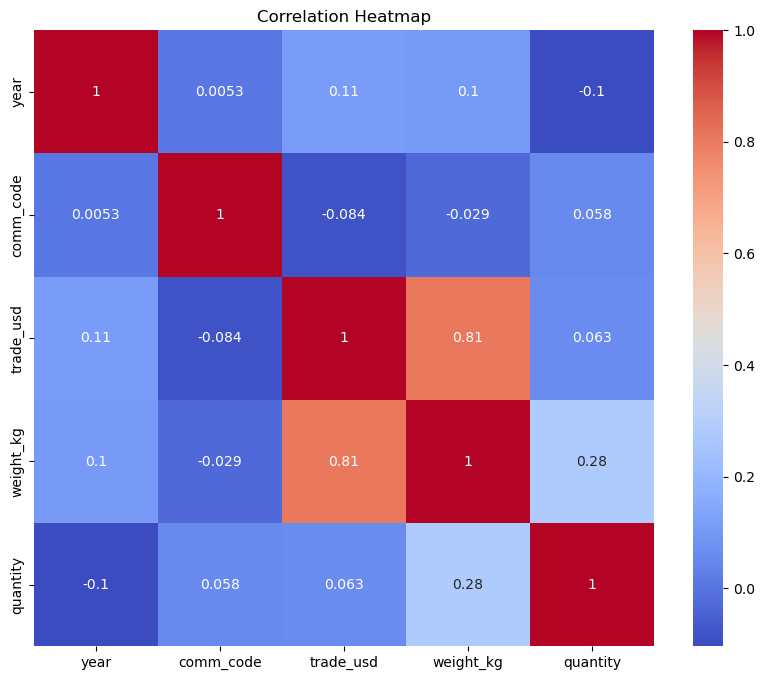

Want to draw more cahrts y/n:n


In [39]:
# - Allow users to select columns and visualize data distributions using histograms or bar charts. 
# - Provide an option to visualize correlations using heatmaps.
while True :  
    print("Data Visulaization Options:") 
    print("\n1. Histogram\n 2. Bar\n 3. Line\n 4. Correlation heatmap") 
    i = int(input("Enter your input 1/2/3/4:"))
    if i == 1 :
        column = input("enter the column name for histogram:") 
        plt.hist(df[column], bins=10, alpha=0.7)
        plt.xlabel(column)
        plt.ylabel("Frequency") 
        plt.title(f"Histogram of {column}")
    
        plt.show()
    elif i == 2 :
        column = input("enter the column name for x axis of Bar Chart:") 
        colum1 = input("enter the column name for y axis of Bar Chart:") 
        sns.countplot(df[column])
        plt.xlabel(column)
        plt.ylabel(colum1)
        plt.title(f"Bar Chart of {column} and {colum1}") 
        plt.show()
    elif i == 3 :
        column = input("enter the column name for x axis of Line Chart:")
        colum1 = input("enter the column name for y axis of Line Chart:") 
        plt.line(df[column])
        plt.xlabel(column)
        plt.ylabel(colum1)
        plt.title(f"Line Chart of {column1} and {column}")
        plt.show() 
    elif i == 4 :
        # Correlation Heatmap
        plt.figure(figsize=(10, 8))
        correlation_matrix = df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show() 
    else : 
        print("Invalid choice:") 
        
    a = input("Want to draw more cahrts y/n:")
    if a == "y" : 
        continue 
    else : 
        break 
        

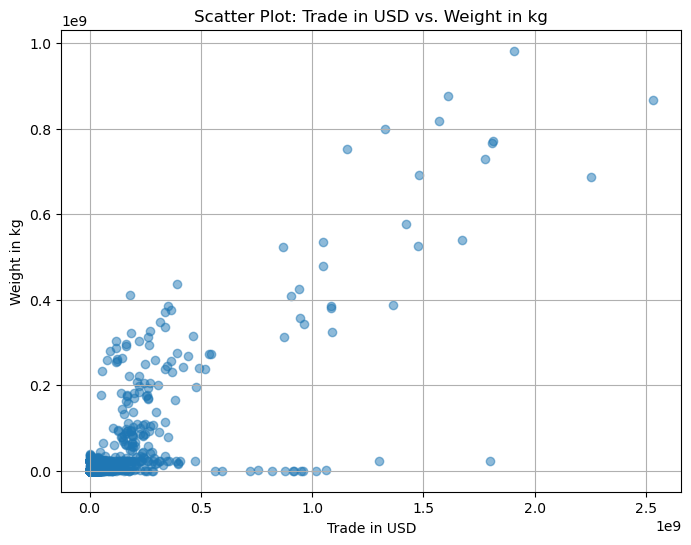

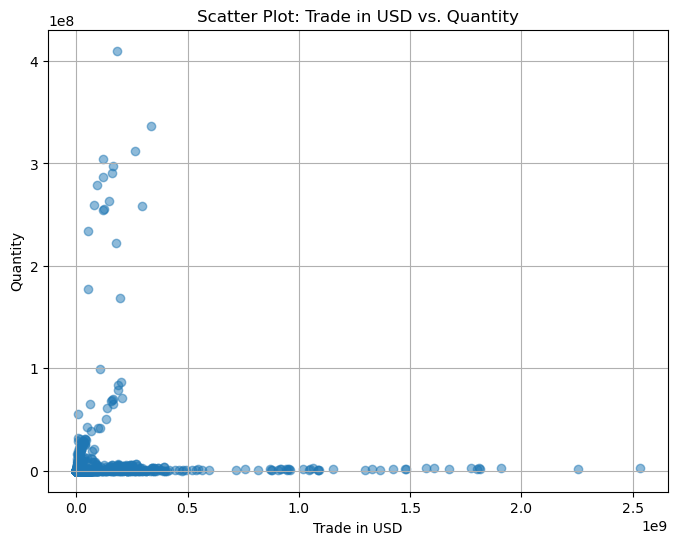

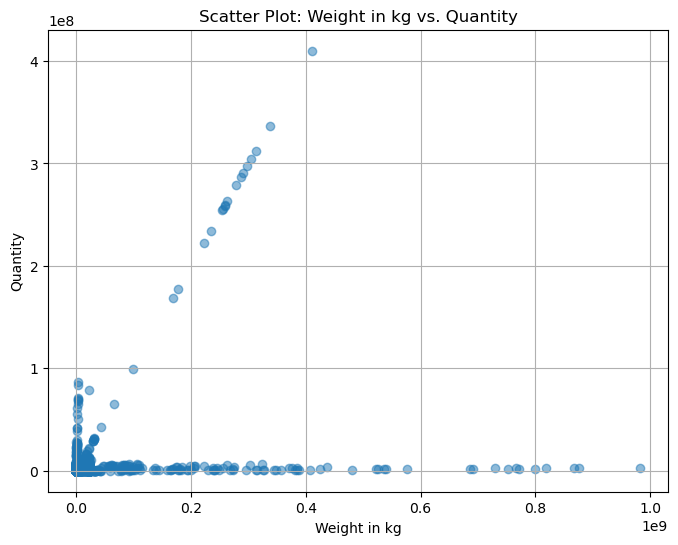

In [31]:
#- Implement scatter plots for bivariate data visualization.
# Scatter Plot: trade_usd vs. weight_kg
plt.figure(figsize=(8, 6))
plt.scatter(df['trade_usd'], df['weight_kg'], alpha=0.5)
plt.xlabel('Trade in USD')
plt.ylabel('Weight in kg')
plt.title('Scatter Plot: Trade in USD vs. Weight in kg')
plt.grid(True)
plt.show()

# Scatter Plot: trade_usd vs. quantity
plt.figure(figsize=(8, 6))
plt.scatter(df['trade_usd'], df['quantity'], alpha=0.5)
plt.xlabel('Trade in USD')
plt.ylabel('Quantity')
plt.title('Scatter Plot: Trade in USD vs. Quantity')
plt.grid(True)
plt.show()

# Scatter Plot: weight_kg vs. quantity
plt.figure(figsize=(8, 6))
plt.scatter(df['weight_kg'], df['quantity'], alpha=0.5)
plt.xlabel('Weight in kg')
plt.ylabel('Quantity')
plt.title('Scatter Plot: Weight in kg vs. Quantity')
plt.grid(True)
plt.show()
